In [42]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  

In [43]:
df = pd.read_csv('insurance.csv')

In [44]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [45]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [46]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [47]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [48]:
df['sex'] = df['sex'].apply(lambda x: 1 if x=='male' else 0)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x=='yes' else 0)

In [49]:
df = df.join(pd.get_dummies(df.region, dtype=int)).drop('region', axis=1)

In [50]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


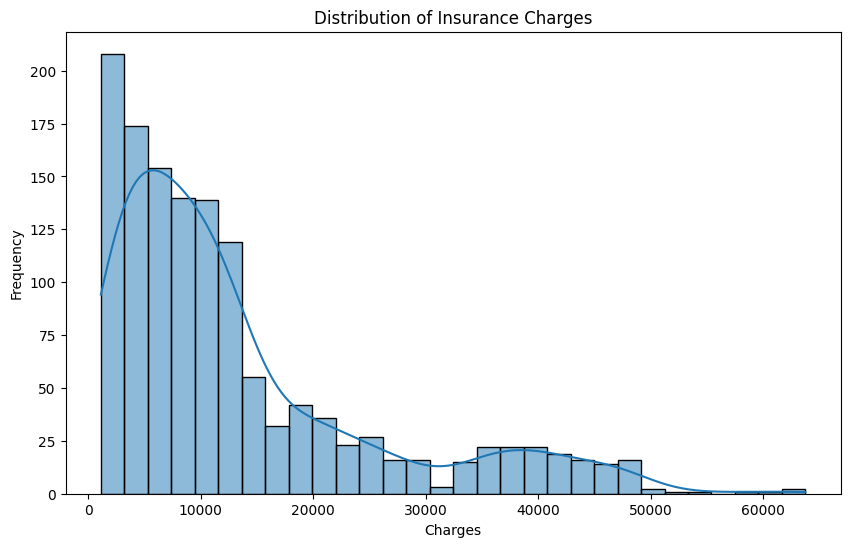

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

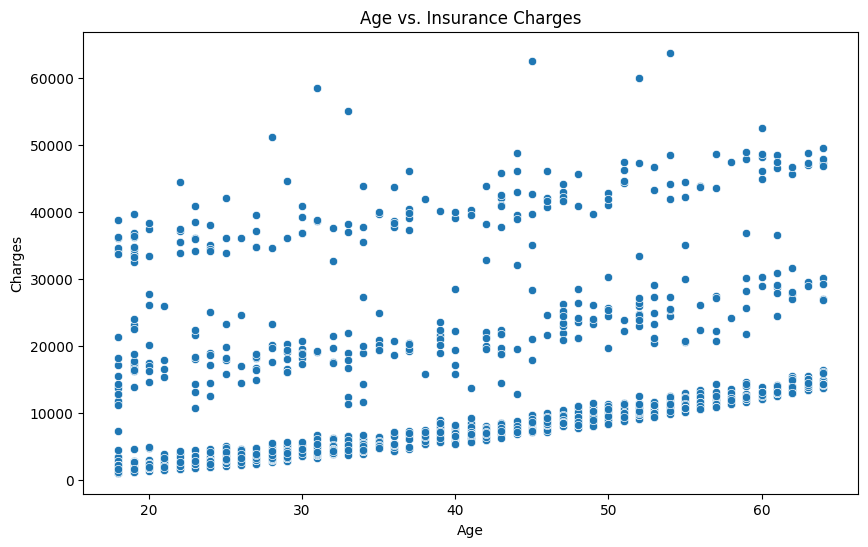

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


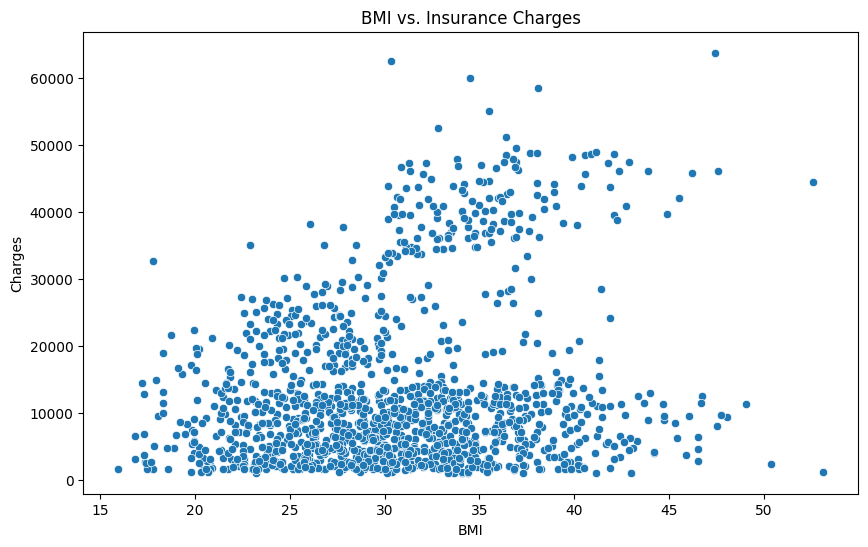

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Insurance Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>],
       [<Axes: title={'center': 'northeast'}>,
        <Axes: title={'center': 'northwest'}>,
        <Axes: title={'center': 'southeast'}>],
       [<Axes: title={'center': 'southwest'}>, <Axes: >, <Axes: >]],
      dtype=object)

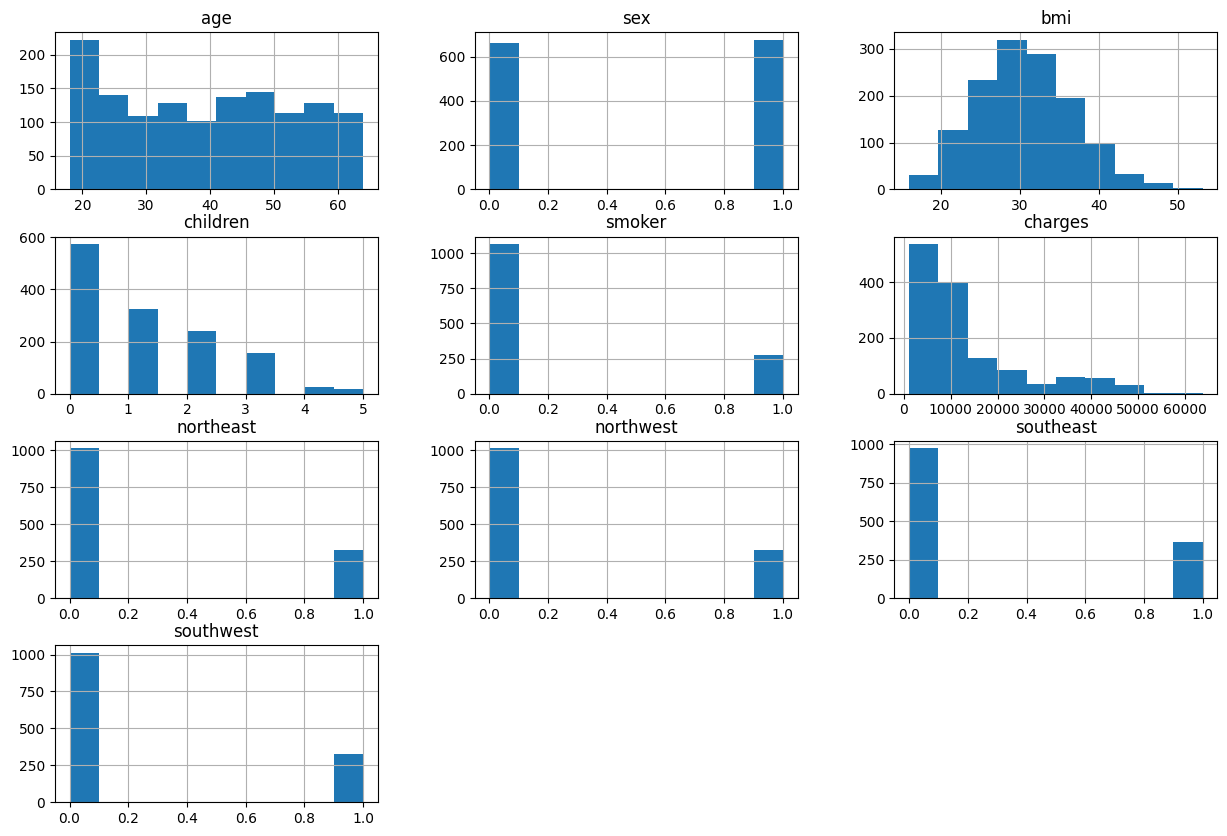

In [54]:
df.hist(figsize=(15,10))

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int32  
 7   northwest  1338 non-null   int32  
 8   southeast  1338 non-null   int32  
 9   southwest  1338 non-null   int32  
dtypes: float64(2), int32(4), int64(4)
memory usage: 83.8 KB


<Axes: >

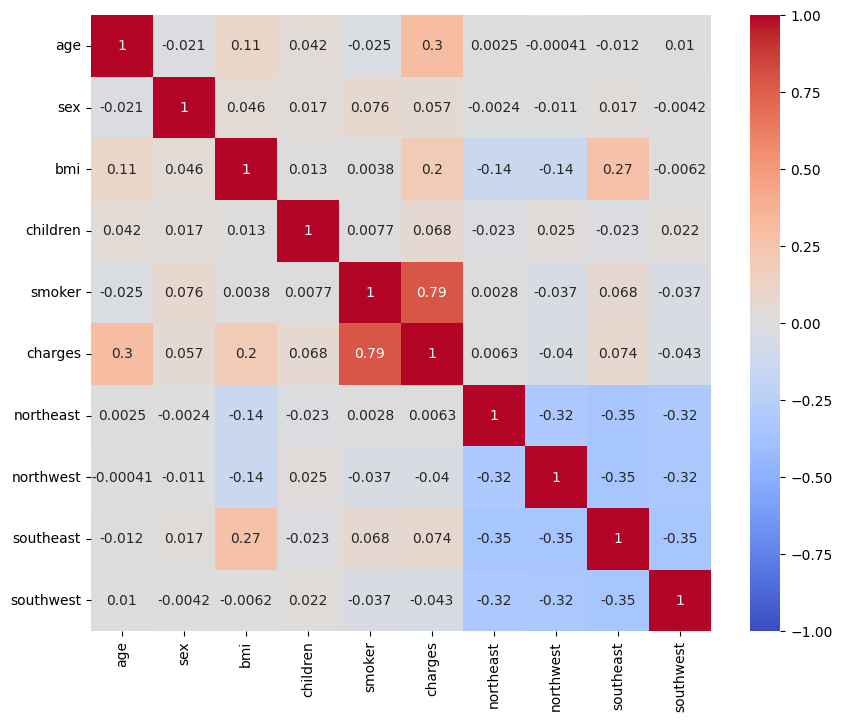

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [59]:
model.score(X_test, y_test)

0.8025518233375164

In [60]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)

In [61]:
rmse

5048.7796421004905

In [62]:
df.charges.std()

12110.011236694001

In [63]:
y_test.std()

11383.390086452708

In [64]:
df.charges.median()

9382.033

In [65]:
mae = mean_absolute_error(y_pred, y_test)

In [66]:
mae

2701.9875398592117

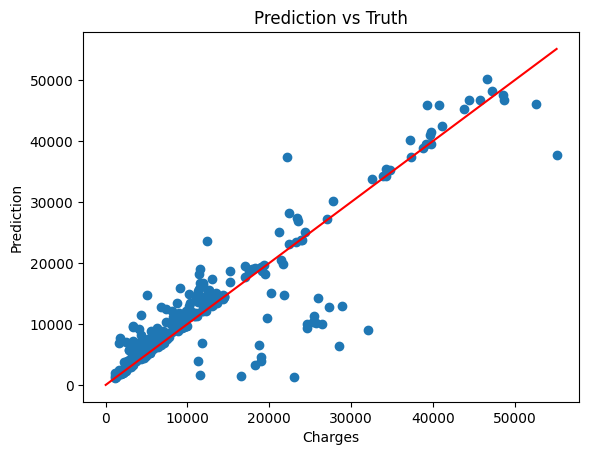

In [67]:
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color = 'red' )
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Truth')
plt.show()

In [68]:
feature_importances = sorted(zip(model.feature_names_in_, model.feature_importances_), key=lambda x: x[1], reverse=True)

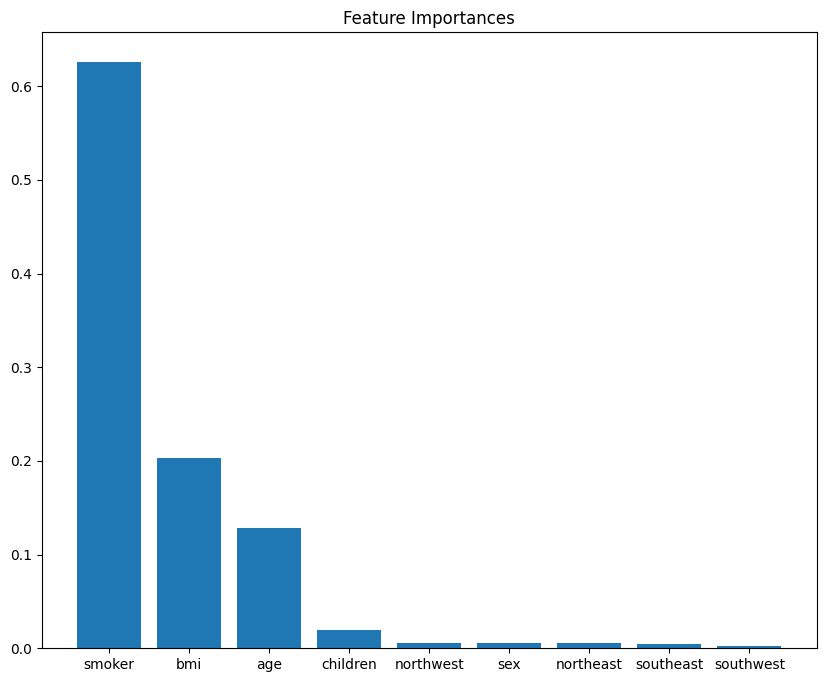

In [69]:
plt.figure(figsize=(10,8))
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances])
plt.title('Feature Importances')
plt.show()

In [70]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 2, 5],
    'min_samples_split': [2, 4, 5, 8],
    'min_samples_leaf': [1, 2, 4, 6]
}

model = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)


In [71]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [None, 2, 5],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 5, 8]})

In [72]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 8}

In [73]:
model = grid_search.best_estimator_

In [74]:
model

RandomForestRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=8,
                      n_jobs=-1)

In [75]:
model.score(X_test, y_test)

0.8272590103215585

In [76]:
y_pred = model.predict(X_test)

In [77]:
rmse = root_mean_squared_error(y_test, y_pred)

In [78]:
rmse

4722.34327980069

In [79]:
mae = mean_absolute_error(y_pred, y_test)

In [80]:
mae

2540.577722696704

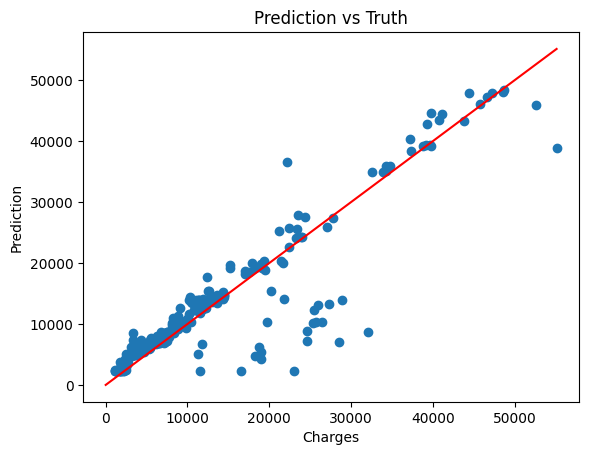

In [81]:
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color = 'red' )
plt.xlabel('Charges')
plt.ylabel('Prediction')
plt.title('Prediction vs Truth')
plt.show()